# PRÁCTICA: FORMULANDO UN PROBLEMA SIMPLE

**Alumno:** VASQUEZ RAMOS, Jose Manuel

**Fecha:** 21/04/2025

___

**Escenario:** Una pequeña empresa produce dos tipos de artesanías: A y B.

- Artesanía A requiere 2 horas de trabajo y da S/ 50 de ganancia.
- Artesanía B requiere 3 horas de trabajo y da S/ 80 de ganancia.
- Se dispone de un máximo de 120 horas de trabajo por semana.
- Se deben producir al menos 10 unidades de A y 5 de B.
-
**Objetivo:** Maximizar la ganancia semanal.

**Tarea:**

Identifiquen

- Variables de Decisión (¿Qué decide la empresa?).
- Función Objetivo (¿Qué quiere maximizar? Escriban la fórmula).
- Restricciones (¿Qué limitaciones tiene? Escríbanlas).

## 1. Importar las bibliotecas necesarias

Comenzamos importando las bibliotecas necesarias. Usaremos `scipy.optimize.linprog` para resolver el problema de programación lineal y `matplotlib` para graficar las restricciones y la solución óptima.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

## 2. Definir los coeficientes de la función objetivo

La función objetivo que queremos maximizar es: $50x+80y$

Sin embargo, linprog está diseñado para resolver problemas de minimización, por lo que en lugar de maximizar, debemos minimizar el valor negativo de la función objetivo: $−50x−80y$

Por lo tanto, definimos los coeficientes de la siguiente manera:

In [2]:
# Coeficientes de la función objetivo
# (negativos porque linprog minimiza)
c = [-50, -80]

## 3. Definir las restricciones

Las restricciones del problema son:

- $2x+3y≤120$
- $-x≤-10$
- $-y≤-5$

Para representarlo en el formato adecuado para linprog, definimos la matriz de coeficientes `A` y el vector `b`:

In [3]:
# Matriz de coeficientes para las desigualdades (Ax <= b)
A = [
    [2, 3],  # Coeficientes para 2x + 3y <= 120
    [-1, 0], # Coeficientes para -x <= -10 (equivalente a x >= 10)
    [0, -1]  # Coeficientes para -y <= -5 (equivalente a y >= 5)
]
b = [120, -10, -5]

## 4. Resolver el problema de optimización

Ahora podemos llamar a `linprog` para resolver el problema. Especificamos el método `highs`.

In [4]:
# Ejecutar el solver
resultado = linprog(c, A_ub=A, b_ub=b, method='highs')

## 5. Verificar si la solución es exitosa y mostrar los resultados

Si el solver encuentra una solución óptima, extraemos las variables _x_ y _y_ calculamos la ganancia máxima. Recordemos que como minimizamos el negativo de la función objetivo, necesitamos tomar el valor negativo de la función objetivo para obtener la ganancia real.

In [5]:
if resultado.success:
    x_opt, y_opt = resultado.x
    ganancia_max = -resultado.fun
    print(f"Producción óptima:")
    print(f"Artesanía A (x) = {x_opt:.2f} unidades")
    print(f"Artesanía B (y) = {y_opt:.2f} unidades")
    print(f"Ganancia máxima = S/ {ganancia_max:.2f}")
else:
    print("No se encontró solución óptima")

Producción óptima:
Artesanía A (x) = 10.00 unidades
Artesanía B (y) = 33.33 unidades
Ganancia máxima = S/ 3166.67


## 6. Graficar las restricciones y la solución óptima

Para visualizar las restricciones y la solución óptima, podemos graficar las líneas correspondientes a las restricciones y luego mostrar el punto óptimo.

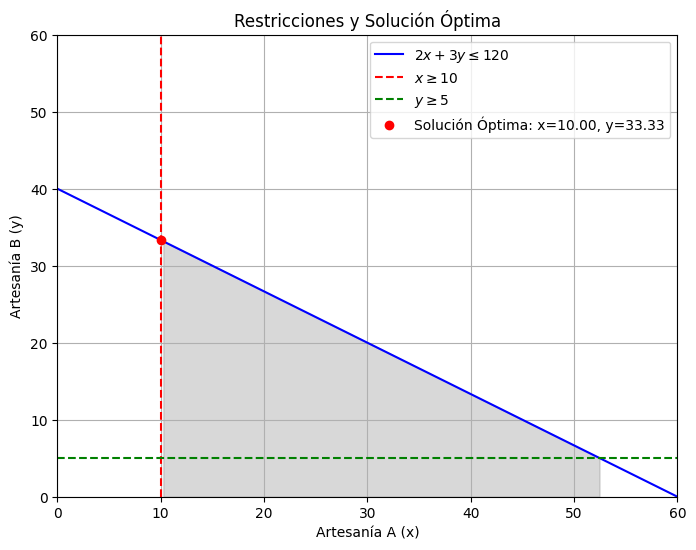

In [6]:
# Graficar las restricciones
x_vals = np.linspace(0, 60, 200)

# Restricción 1: 2x + 3y <= 120 -> y = (120 - 2x) / 3
y_vals_1 = (120 - 2 * x_vals) / 3

# Restricción 2: x >= 10
x_vals_2 = np.full_like(x_vals, 10)

# Restricción 3: y >= 5
y_vals_3 = np.full_like(x_vals, 5)

# Graficar las líneas de las restricciones
plt.figure(figsize=(8, 6))

plt.plot(x_vals, y_vals_1, label=r'$2x + 3y \leq 120$', color='blue')
plt.axvline(x=10, color='red', linestyle='--', label=r'$x \geq 10$')
plt.axhline(y=5, color='green', linestyle='--', label=r'$y \geq 5$')

# Rellenar la zona factible (intersección de las restricciones)
plt.fill_between(x_vals, 0, y_vals_1, where=(y_vals_1 >= 5) & (x_vals >= 10), color='gray', alpha=0.3)

# Mostrar la solución óptima
if resultado.success:
    plt.plot(x_opt, y_opt, 'ro', label=f'Solución Óptima: x={x_opt:.2f}, y={y_opt:.2f}')

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel('Artesanía A (x)')
plt.ylabel('Artesanía B (y)')
plt.title('Restricciones y Solución Óptima')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
